ARIMA 모델은 시계열을 예측하는 접근 방식.
ARIMA 모델은 데이터에 나타나는 자기상관(AutoCorrelation)을 표현하는데 목적이 있다.

지수평활(exponential smoothing)은 무엇인가? 이것도 봐볼까?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import datetime
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

from scipy.stats import t
from statsmodels.formula.api import ols

In [4]:
uploaded = files.upload()

Saving data.csv to data.csv


In [5]:
df = pd.read_csv(io.StringIO(uploaded['data.csv'].decode("cp949")))

df['날짜'] = pd.to_datetime(df["날짜"])
Date = df["날짜"]
PM10 = df["PM10"]
PM25 = df["PM2.5"]
ozon = df["오존"]
NO2 = df["이산화질소"]
SO2 = df['아황산가스']

df.index = df["날짜"]
#df.drop("날짜", axis = 1, inplace = True)


In [6]:
PM10_ori = df.loc[:,["날짜","PM10"]]
PM10_ori.index = PM10_ori.날짜
df_PM10 = PM10_ori.drop("날짜", axis = 1)
df_PM10

,PM10
날짜,
2018-11-01,27
2018-11-02,30
2018-11-03,27
2018-11-04,33
2018-11-05,35
...,...
2021-10-27,57
2021-10-28,35
2021-10-29,23


In [7]:
PM10 = df["PM10"]
PM10

날짜
2018-11-01    27
2018-11-02    30
2018-11-03    27
2018-11-04    33
2018-11-05    35
              ..
2021-10-27    57
2021-10-28    35
2021-10-29    23
2021-10-30    19
2021-10-31    20
Name: PM10, Length: 1096, dtype: int64

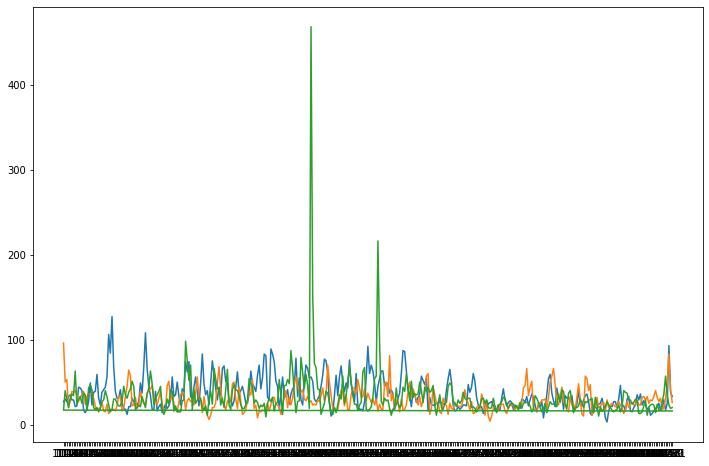

In [8]:
# 계절성이 띄는 것을 보기 위해 1년 간격으로 그래프를 그려보고 그걸 겹쳐보자 ?
PM10_1 = PM10[:365]
PM10_2 = PM10[365:730]
PM10_3 = PM10[730:]


total1 = []
total3 = []
for i in PM10_1.index :
  total1.append(str(i.month) + "-" + str(i.day) )


PM10_1.index = total1
PM10_2.index = total1

for i in PM10_3.index :
  total3.append(str(i.month) + "-" + str(i.day))

PM10_3.index = total3


plt.figure(figsize = (12,8))

plt.plot(PM10_1)
plt.plot(PM10_2)
plt.plot(PM10_3)

In [9]:
#IQR 방식 이상치 탐지
q1 = PM10.quantile(0.25)
q3 = PM10.quantile(0.75)
iqr = q3 - q1

print(f"q1은 {q1}, q3는 {q3}")
print(f"q3 + 1.5*iqr은 {q3 + 1.5 * iqr}")
condition = PM10 > q3 + 1.5*iqr

a = PM10[condition].index
print(f"바뀌지 않은 PM10 개수 {len(PM10)}")

PM10.drop(a, inplace = True)

#plt.plot(PM10)

print("바뀐 PM10 개수 ")
print(len(PM10))

q1은 21.0, q3는 39.0
q3 + 1.5*iqr은 66.0
바뀌지 않은 PM10 개수 1096
바뀐 PM10 개수 
1050


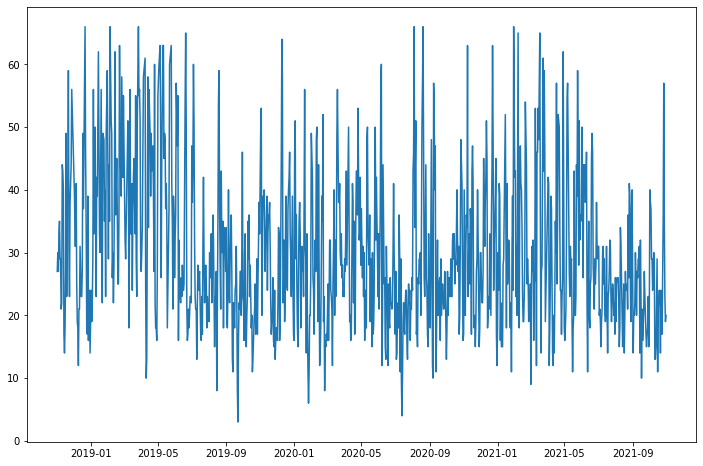

In [10]:
# 날짜별 미세먼지 변화
plt.figure(figsize = (12,8))

plt.plot(PM10)

plt.show()

# 정상성을 띄는 것으로 보임.
# 계절성이 있는 것 같지 않음

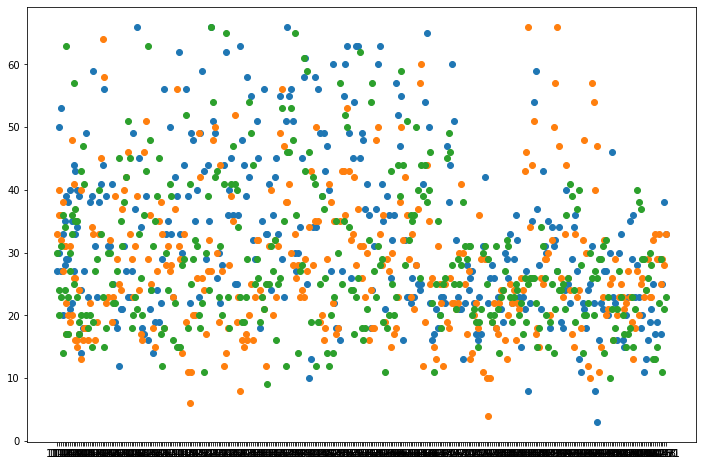

In [11]:
# 계절성이 띄는 것을 보기 위해 1년 간격으로 그래프를 그려보고 그걸 겹쳐보자 ?
PM10_1 = PM10[:350]
PM10_2 = PM10[350:700]
PM10_3 = PM10[700:]


total1 = []
for i in PM10_1.index :
  total1.append(str(i.month) + "-" + str(i.day) )


#PM10_1.index = total1
#PM10_2.index = total1
#PM10_3.index = total1


plt.figure(figsize = (12,8))

plt.scatter(total1,PM10_1)
plt.scatter(total1,PM10_2)
plt.scatter(total1,PM10_3)

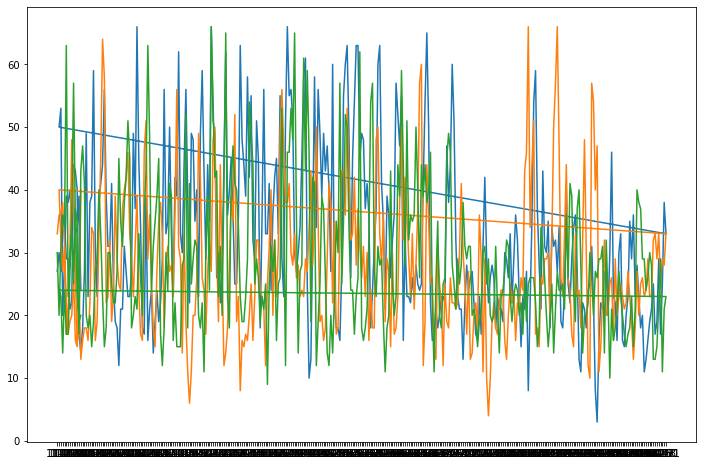

In [12]:
plt.figure(figsize = (12,8))

plt.plot(total1, PM10_1)
plt.plot(total1, PM10_2)
plt.plot(total1, PM10_3)

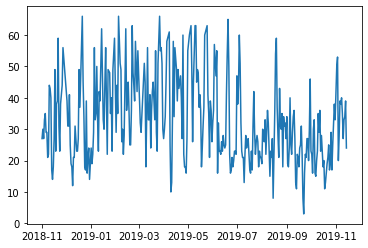

In [13]:
plt.plot(PM10_1)

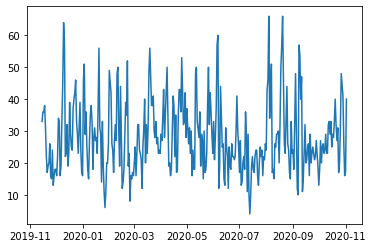

In [14]:
plt.plot(PM10_2)

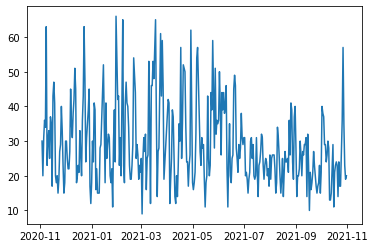

In [15]:
plt.plot(PM10_3)

계절성이 따로 없는 것으로 파악됨.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 432x288 with 0 Axes>

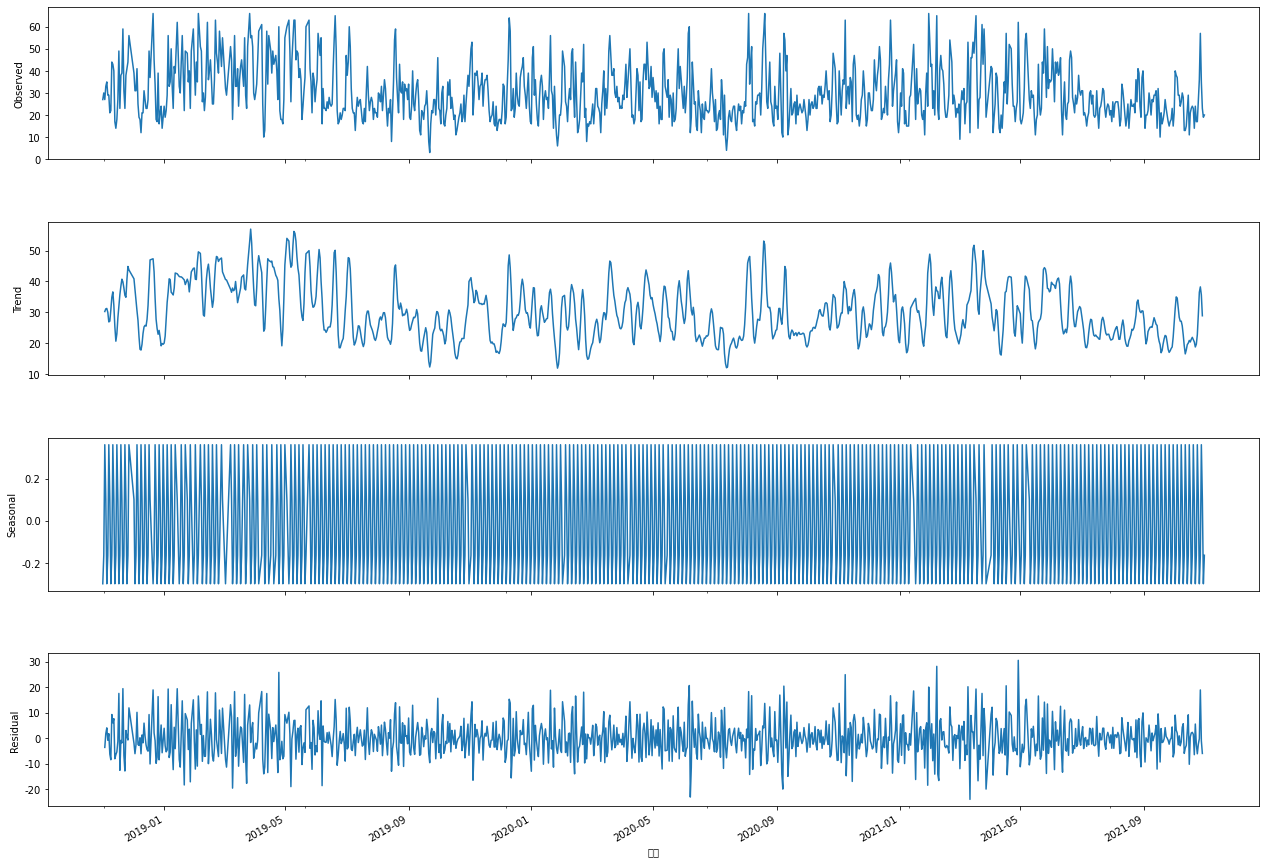

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(PM10, model = 'additive', freq = 4)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

자기 상관 함수 (ACF)는 k시간 단위로 구분된 시계열의 관측치 간 상관 관계 함수, 즉 k가 1,2,3... 일 때, k단계 떨어진 데이터 점 쌍 간들의 상관 관계를 말한다.

정상성을 나타내는 시계열에서는, ACF가 느리게 감소. 정상성을 나타내는 시계열에서는, ACF가 비교적 빠르게 0으로 떨어질 것이다. 

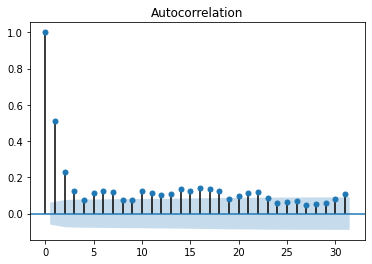

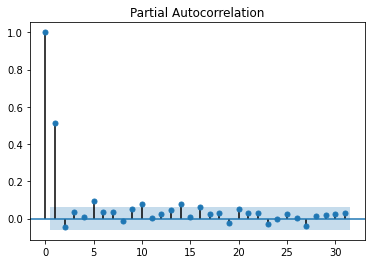

In [19]:
plot_acf(PM10)
plot_pacf(PM10)
plt.show()

# 자신을 제외한 첫번째 lag 이후 절단면을 보임. AR 오더는 1 => PACF를 보았을 때.


단위근 검정 ADF검정 (Augmented Dickey - Fuller test)으로 정상성을 확인해보자.

H0(귀무가설) : 자료에 단위근이 존재한다. 즉, 정상성을 만족하지 않는다.

H1(대립가설) : 자료가 정상성을 만족한다.

In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(PM10)
print("ADF Statistic : %f" %result[0])
print('p-value: %f' %result[1])
print("Critical Values :")
for key, value in result[4].items():
  print("\t%s : %.3f " %(key, value))

ADF Statistic : -5.166089
p-value: 0.000010
Critical Values :
	1% : -3.437 
	5% : -2.864 
	10% : -2.568 


p value가 0.05보다 작으니까 귀무가설 기각.
대립가설 채택. 자료가 정상성을 만족한다.

시계열 분석을 하기 위해 시계열이 정상성이 있다는 가정을 만족해야하는데 이를 만족하기 때문에 ARIMA 모형 선택할 수 있다.

In [35]:
from statsmodels.tsa.arima_model import ARIMA

model1 = ARIMA(PM10, order = (2,1,1))
model1_fit = model1.fit(trend = 'nc', full_output = True, disp = True)
print(model1_fit.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.PM10   No. Observations:                 1049
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3947.885
Method:                       css-mle   S.D. of innovations             10.418
Date:                Mon, 27 Jun 2022   AIC                           7903.771
Time:                        12:35:39   BIC                           7923.593
Sample:                             1   HQIC                          7911.287
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.PM10     0.4887      0.032     15.443      0.000       0.427       0.551
ar.L2.D.PM10    -0.0912      0.032     -2.894      0.004      -0.153      -0.029
ma.L1.D.PM10    -0.9715      0.008   -115.11

In [34]:
model2 = ARIMA(PM10, order = (1,1,2))
model2_fit = model2.fit(trend = 'nc', full_output = True, disp = True)
print(model2_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.PM10   No. Observations:                 1049
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3948.110
Method:                       css-mle   S.D. of innovations             10.420
Date:                Mon, 27 Jun 2022   AIC                           7904.219
Time:                        12:35:09   BIC                           7924.042
Sample:                             1   HQIC                          7911.736
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.PM10     0.2998      0.067      4.451      0.000       0.168       0.432
ma.L1.D.PM10    -0.7834      0.069    -11.338      0.000      -0.919      -0.648
ma.L2.D.PM10    -0.1841      0.065     -2.83

In [36]:
model3 = ARIMA(PM10, order = (3,1,1))
model3_fit = model3.fit(trend = 'nc', full_output = True, disp = True)
print(model3_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.PM10   No. Observations:                 1049
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -3947.786
Method:                       css-mle   S.D. of innovations             10.417
Date:                Mon, 27 Jun 2022   AIC                           7905.573
Time:                        12:36:17   BIC                           7930.350
Sample:                             1   HQIC                          7914.968
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.PM10     0.4865      0.032     15.190      0.000       0.424       0.549
ar.L2.D.PM10    -0.0851      0.034     -2.474      0.014      -0.152      -0.018
ar.L3.D.PM10    -0.0142      0.032     -0.44

In [38]:
model4 = ARIMA(PM10, order = (1,1,1))
model4_fit = model4.fit(trend = 'nc', full_output = True, disp = True)
print(model4_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.PM10   No. Observations:                 1049
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3952.044
Method:                       css-mle   S.D. of innovations             10.459
Date:                Mon, 27 Jun 2022   AIC                           7910.088
Time:                        12:37:14   BIC                           7924.955
Sample:                             1   HQIC                          7915.726
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.PM10     0.4546      0.029     15.493      0.000       0.397       0.512
ma.L1.D.PM10    -0.9767      0.007   -131.885      0.000      -0.991      -0.962
                                    Roots   

In [39]:
model5 = ARIMA(PM10, order = (2,1,2))
model5_fit = model5.fit(trend = 'nc', full_output = True, disp = True)
print(model5_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.PM10   No. Observations:                 1049
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3948.159
Method:                       css-mle   S.D. of innovations             10.421
Date:                Mon, 27 Jun 2022   AIC                           7906.318
Time:                        12:37:48   BIC                           7931.096
Sample:                             1   HQIC                          7915.714
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.PM10    -0.1083      0.310     -0.349      0.727      -0.716       0.500
ar.L2.D.PM10     0.1973      0.160      1.235      0.217      -0.116       0.510
ma.L1.D.PM10    -0.3788      0.302     -1.25

Model1, ARIMA(2,1,1)의 AIC가 가장 작으니까 Model1 채택.

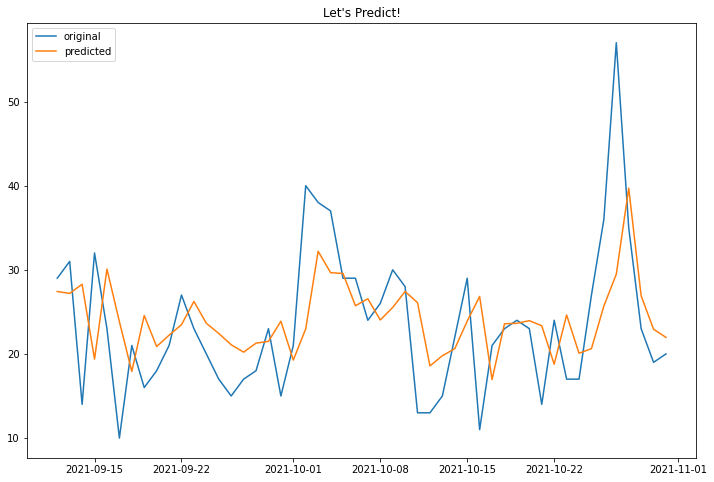

In [52]:
start_index = PM10.index[1000]
end_index = PM10.index[-1]
forecast = model1_fit.predict(start = start_index , end = end_index, typ = 'levels')

plt.figure(figsize = (12,8))
plt.plot(PM10[1000:], label = 'original')
plt.plot(forecast, label = 'predicted')
plt.title("Let's Predict!")
plt.legend()
plt.show()
